In [1]:
import pandas as pd 
import  os 

import jmespath

from urllib.parse import urlparse


In [2]:
def get_repo_name_from_url(url):
    if "https://" not in url and "http://" not in url :
        return None 
    url_info  = urlparse(url)
    if "github.com" not in  url_info.hostname :
        return None 
    # print (url_info)
    url_info_path = url_info.path
    if url_info_path.count("/")<=2:
        return None
    if "api.github.com" in url_info.hostname :
        return "/".join(  url_info_path.split("/")[2:4] )
    else:
        return "/".join(  url_info_path.split("/")[1:3] )



In [3]:
assert get_repo_name_from_url("http://10.96.187.131:39020/notebooks/notebooks%2Fgrp_repo_from_api.ipynb")==None
assert get_repo_name_from_url("https://docs.python.org/3/library/urllib.parse.html")== None 
assert get_repo_name_from_url("https://api.github.com/repos/redis/redis/pulls/12167") == "redis/redis"
assert get_repo_name_from_url("https://api.github.com/repos/danmar/cppcheck/commits/453a69dd8c41359655ab030984f1868653a85605")=="danmar/cppcheck"
assert get_repo_name_from_url("https://github.com/redis/redis/pulls/12167") == "redis/redis"
assert get_repo_name_from_url("https://github.com/danmar/cppcheck/commits/453a69dd8c41359655ab030984f1868653a85605")=="danmar/cppcheck"

assert get_repo_name_from_url("https://www.github.com/redis/redis/pulls/12167") == "redis/redis"
assert get_repo_name_from_url("https://www.github.com/danmar/cppcheck/commits/453a69dd8c41359655ab030984f1868653a85605")=="danmar/cppcheck"
assert get_repo_name_from_url("https://github.com/") == None
assert get_repo_name_from_url("https://github.com/danmar/")==None

assert get_repo_name_from_url("https://www.github.com/redis") == None


In [4]:
import json
def read_jsonl_to_freq(jsonl_p_list):
    jsonl_p_list = [jsonl_p_list] if type(jsonl_p_list)==str else jsonl_p_list 
    final_list = []

    for jsonl_p in jsonl_p_list :
        with open(jsonl_p) as f :
            lines_raw = f.readlines()
            lines = []
            for x in lines_raw:
                try :
                    lines.append( eval(x) )
                except :
                    print (x,type(x), "--->")
                    pass 
                
            # lines = [json.loads(x) for x in lines ]
        for x in lines:
            url = x[-1]
            ff = x[0]
            final_list.append( {"repo":get_repo_name_from_url(url), "fn":ff , "url":url } )

    df = pd.DataFrame( final_list )
    df['frequency'] = df.groupby('repo')['repo'].transform('count')
    df.sort_values(['frequency', 'repo'], inplace=True, ascending=[False, True])
    return df 
    


In [5]:
from glob2 import  glob 
interest_list = glob( "./how_many_x_filter_step2.jsonl" )

df123 = read_jsonl_to_freq(jsonl_p_list= interest_list )
#"/tmp/how_many_githu_fix_err_filter.jsonl" )

<AxesSubplot:>

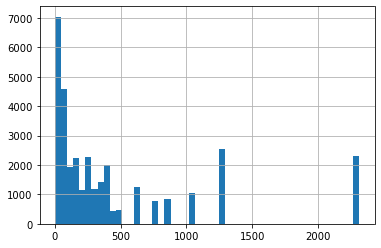

In [6]:
df123["frequency"].hist(bins=50)

In [7]:
for th in [5,10,20,50,100,300 ]:
    df_test  = df123[ df123["frequency"]> th ]
    unq = df_test["repo"].unique()
    unq = list(set( unq ))
    print (th, "-->", len(unq) ) 


5 --> 539
10 --> 380
20 --> 255
50 --> 128
100 --> 67
300 --> 20


In [8]:
import pprint 

df123 = df123.sort_values(by="frequency",ascending=False )

df123["repo_freq"]= df123.apply(lambda row:"{}--->{}".format(row["repo"],row["frequency"]), axis=1 ) 

pprint.pprint( list(df123["repo_freq"].unique()) ) 

['apple/llvm-project--->2312',
 'apple/swift-clang--->1279',
 'danmar/cppcheck--->1258',
 'llvm-mirror/clang--->1044',
 'tensorflow/tensorflow--->841',
 'ceph/ceph--->782',
 'facebook/rocksdb--->641',
 'brave/brave-core--->611',
 'apple/swift--->472',
 'dealii/dealii--->443',
 'CESNET/libyang--->415',
 'envoyproxy/envoy--->414',
 'arangodb/arangodb--->401',
 'StarRocks/starrocks--->399',
 'espressif/esp-idf--->382',
 'rapidsai/cudf--->365',
 'qgis/QGIS--->353',
 'v8/v8--->344',
 'nginx/njs--->343',
 'Juniper/contrail-controller--->324',
 'KhronosGroup/SPIRV-Tools--->289',
 'yugabyte/yugabyte-db--->285',
 'libgit2/libgit2--->285',
 'TileDB-Inc/TileDB--->273',
 'stillwater-sc/universal--->269',
 'microsoft/onnxruntime--->267',
 'pybind/pybind11--->263',
 'apache/arrow--->253',
 'ginkgo-project/ginkgo--->248',
 'EOSIO/eos--->235',
 'wazuh/wazuh--->234',
 'opencv/opencv--->233',
 'sysrepo/sysrepo--->205',
 'pgbackrest/pgbackrest--->204',
 'spdk/spdk--->191',
 'openssl/openssl--->188',
 'da

In [9]:
uq = df123[ df123["frequency"]> 50 ]["repo"].unique()
uq.tolist()


['apple/llvm-project',
 'apple/swift-clang',
 'danmar/cppcheck',
 'llvm-mirror/clang',
 'tensorflow/tensorflow',
 'ceph/ceph',
 'facebook/rocksdb',
 'brave/brave-core',
 'apple/swift',
 'dealii/dealii',
 'CESNET/libyang',
 'envoyproxy/envoy',
 'arangodb/arangodb',
 'StarRocks/starrocks',
 'espressif/esp-idf',
 'rapidsai/cudf',
 'qgis/QGIS',
 'v8/v8',
 'nginx/njs',
 'Juniper/contrail-controller',
 'KhronosGroup/SPIRV-Tools',
 'yugabyte/yugabyte-db',
 'libgit2/libgit2',
 'TileDB-Inc/TileDB',
 'stillwater-sc/universal',
 'microsoft/onnxruntime',
 'pybind/pybind11',
 'apache/arrow',
 'ginkgo-project/ginkgo',
 'EOSIO/eos',
 'wazuh/wazuh',
 'opencv/opencv',
 'sysrepo/sysrepo',
 'pgbackrest/pgbackrest',
 'spdk/spdk',
 'openssl/openssl',
 'daos-stack/daos',
 'halide/Halide',
 'stan-dev/math',
 'PaddlePaddle/Paddle',
 'qemu/qemu',
 'realm/realm-core',
 'qt/qtwebengine',
 'DynamoRIO/dynamorio',
 'grpc/grpc',
 'apache/kudu',
 'llvm-mirror/clang-tools-extra',
 'pytorch/glow',
 'skypjack/entt',
 'g

In [10]:
uq = df123[ df123["frequency"]> 50 ]["repo"].unique()
uq_list = uq.tolist()

a="\n".join( ["nohup git clone https://github.com/{} {} 2>&1 >/dev/null & ".format(x, x.replace("/","@")  ) for x in uq_list ] )

with open("/tmp/c.list","w") as t:
    t.write(a)


In [11]:
pd.to_datetime("2018-08-01T01:03:33Z")

Timestamp('2018-08-01 01:03:33+0000', tz='UTC')

In [12]:
def is_test_filename(file_path):
    def is_test_file_path(xpath):
        d= os.path.dirname( xpath )
        if len(d)<=0:
            return False #raise Exception("unk {} , {}".format(d, file_path) )
        d = d if "/" ==d[0] else "/"+d
        return any(["/test/" in d or "/tests/" in d ] )
    flg = []
    flg+=[ os.path.basename(file_path) .startswith("test") ]
    flg+=[  os.path.basename(file_path) .endswith("test.c") ]
    flg+=[  os.path.basename(file_path) .endswith("test.cc") ]
    flg+=[  os.path.basename(file_path) .endswith("test.cpp") ]
    flg+=[  os.path.basename(file_path) .endswith("tests.c") ]
    flg+=[  os.path.basename(file_path) .endswith("tests.cc") ]
    flg+=[  os.path.basename(file_path) .endswith("tests.cpp") ]
    flg+=[   is_test_file_path( xpath=file_path)  ]
    
    return any( flg )


def get_sub_from_url(row):
    f_p = row["fn"]
    with open(f_p) as fff :
        data = json.load(fff)
    urls = jmespath.search("files[].filename", data)
    urls = [x for x in urls if not is_test_filename(x) ]
    if len(urls)<=0 :
        return None 

    urls = [x.split("/")[0] for x in urls ]
    row["sub_project"] =  urls[0]
    row["date_commit"] = pd.to_datetime(  jmespath.search( "commit.committer.date", data) )
    return row 


In [13]:
import jmespath 

df123_apple_llvm = df123[ df123["repo"]=="apple/llvm-project"]  

# df123_apple_llvm["sub_project"]=  df123_apple_llvm["fn"].apply( get_sub_from_url )
df123_apple_llvm["sub_project"]=""
df123_apple_llvm["date_commit"]=""

df123_apple_llvm = df123_apple_llvm.apply( get_sub_from_url ,axis=1)



/tmp/ipykernel_6559/3799053146.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df123_apple_llvm["sub_project"]=""
/tmp/ipykernel_6559/3799053146.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df123_apple_llvm["date_commit"]=""


In [14]:
df123_apple_llvm["sub_project"].value_counts()

clang                1559
clang-tools-extra     293
lldb                  183
compiler-rt            66
openmp                 52
llvm                   49
libcxx                 45
libc                   41
mlir                   23
flang                   1
Name: sub_project, dtype: int64

In [15]:
df123_apple_llvm.sort_values(['date_commit'], inplace=True, ascending=False  )


df123_apple_llvm

,repo,fn,url,frequency,repo_freq,sub_project,date_commit
2263,apple/llvm-project,/data3/code_dst2/api_github_dirs/online_extrac...,https://api.github.com/repos/apple/llvm-projec...,2312,apple/llvm-project--->2312,clang,2022-12-21 18:50:05+00:00
25717,apple/llvm-project,/data3/code_dst2/api_github_dirs/online_extrac...,https://api.github.com/repos/apple/llvm-projec...,2312,apple/llvm-project--->2312,clang,2022-12-21 18:50:05+00:00
13367,apple/llvm-project,/data3/code_dst2/api_github_dirs/online_extrac...,https://api.github.com/repos/apple/llvm-projec...,2312,apple/llvm-project--->2312,clang,2022-12-21 18:50:05+00:00
29981,apple/llvm-project,/data3/code_dst2/api_github_dirs/online_extrac...,https://api.github.com/repos/apple/llvm-projec...,2312,apple/llvm-project--->2312,clang,2022-12-21 18:50:05+00:00
7770,apple/llvm-project,/data3/code_dst2/api_github_dirs/online_extrac...,https://api.github.com/repos/apple/llvm-projec...,2312,apple/llvm-project--->2312,clang,2022-12-21 18:50:05+00:00
...,...,...,...,...,...,...,...
31104,apple/llvm-project,/data3/code_dst2/api_github_dirs/online_extrac...,https://api.github.com/repos/apple/llvm-projec...,2312,apple/llvm-project--->2312,clang,2019-10-18 20:15:29+00:00
26840,apple/llvm-project,/data3/code_dst2/api_github_dirs/online_extrac...,https://api.github.com/repos/apple/llvm-projec...,2312,apple/llvm-project--->2312,clang,2019-10-18 20:15:29+00:00
4330,apple/llvm-project,/data3/code_dst2/api_github_dirs/online_extrac...,https://api.github.com/repos/apple/llvm-projec...,2312,apple/llvm-project--->2312,clang,2019-10-17 21:57:28+00:00
32048,apple/llvm-project,/data3/code_dst2/api_github_dirs/online_extrac...,https://api.github.com/repos/apple/llvm-projec...,2312,apple/llvm-project--->2312,clang,2019-10-17 21:57:28+00:00


In [16]:
df123_apple_llvm.to_json(orient="records")


'[{"repo":"apple\\/llvm-project","fn":"\\/data3\\/code_dst2\\/api_github_dirs\\/online_extracted\\/Imh0dHBzOi8vYXBpLmdpdGh1Yi5jb20vcmVwb3MvYXBwbGUvbGx2bS1wcm9qZWN0L2NvbW1pdHMvNDc1Y2M0NGEyY2JhNDVjNTQ0OWEzMjNjNmIzMzFkZGM1OTNiZDhkZSI=.json","url":"https:\\/\\/api.github.com\\/repos\\/apple\\/llvm-project\\/commits\\/475cc44a2cba45c5449a323c6b331ddc593bd8de","frequency":2312,"repo_freq":"apple\\/llvm-project--->2312","sub_project":"clang","date_commit":1671648605000},{"repo":"apple\\/llvm-project","fn":"\\/data3\\/code_dst2\\/api_github_dirs\\/online_extracted\\/Imh0dHBzOi8vYXBpLmdpdGh1Yi5jb20vcmVwb3MvYXBwbGUvbGx2bS1wcm9qZWN0L2NvbW1pdHMvNDc1Y2M0NGEyY2JhNDVjNTQ0OWEzMjNjNmIzMzFkZGM1OTNiZDhkZSI=.json","url":"https:\\/\\/api.github.com\\/repos\\/apple\\/llvm-project\\/commits\\/475cc44a2cba45c5449a323c6b331ddc593bd8de","frequency":2312,"repo_freq":"apple\\/llvm-project--->2312","sub_project":"clang","date_commit":1671648605000},{"repo":"apple\\/llvm-project","fn":"\\/data3\\/code_dst2\\/api_gi